In [7]:
import numpy as np
import tensorflow as tf
from analysis_functions import Analysis
import matplotlib.pyplot as plt

In [31]:
uqc_2qubits_2layers_path = "../../results/overparametrization/2_qubits_2layer"
uqc_2qubits_5layers_path = "../../results/overparametrization/2_qubits_5layer"
skolik_5layers_path = "../../results/overparametrization/skolik_5layers"
skolik_2layers_path = "../../results/overparametrization/skolik_2layers"

skolik_5layers = Analysis(skolik_5layers_path)
skolik_3layers = Analysis(skolik_2layers_path)
uqc_2qubits_2layers = Analysis(uqc_2qubits_2layers_path)
uqc_2qubits_5layers = Analysis(uqc_2qubits_5layers_path)

In [32]:
uqc_2qubits_2layers_parameters_relative_change = uqc_2qubits_2layers.get_parameters_relative_change()
uqc_2qubits_5layers_parameters_relative_change = uqc_2qubits_5layers.get_parameters_relative_change()
skolik_5layers_parameters_relative_change = skolik_5layers.get_parameters_relative_change()
skolik_2layers_parameters_relative_change = skolik_3layers.get_parameters_relative_change()

In [33]:
def filter_lists(lists):
    min_length = min(len(lst) for lst in lists)  # Find the length of the smallest list
    
    filtered_lists = []
    for lst in lists:
        filtered_lst = lst[:min_length]  # Take only the first min_length elements
        filtered_lists.append(filtered_lst)  # Add the filtered list to the result
    
    return filtered_lists

uqc_2qubits_2layers_parameters_relative_change = filter_lists(uqc_2qubits_2layers_parameters_relative_change)
uqc_2qubits_5layers_parameters_relative_change = filter_lists(uqc_2qubits_5layers_parameters_relative_change)
skolik_5layers_parameters_relative_change = filter_lists(skolik_5layers_parameters_relative_change)
skolik_2layers_parameters_relative_change = filter_lists(skolik_2layers_parameters_relative_change)

In [34]:
uqc_2layers_parameters_relative_change_mean = np.mean(uqc_2qubits_2layers_parameters_relative_change, axis=0)
uqc_5layers_parameters_relative_change_mean = np.mean(uqc_2qubits_5layers_parameters_relative_change, axis=0)
skolik_5layers_parameters_relative_change_mean = np.mean(skolik_5layers_parameters_relative_change, axis=0)
skolik_2layers_parameters_relative_change_mean = np.mean(skolik_2layers_parameters_relative_change, axis=0)

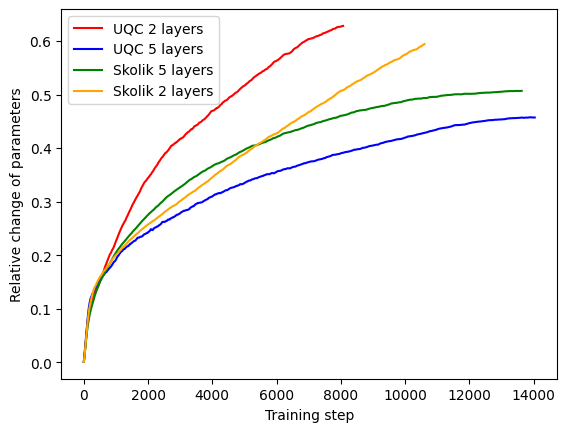

In [35]:
plt.plot(uqc_2layers_parameters_relative_change_mean,color = "red", label="UQC 2 layers")
plt.plot(uqc_5layers_parameters_relative_change_mean,color = "blue", label="UQC 5 layers")
plt.plot(skolik_5layers_parameters_relative_change_mean,color = "green", label="Skolik 5 layers")
plt.plot(skolik_2layers_parameters_relative_change_mean,color = "orange", label="Skolik 2 layers")
plt.xlabel("Training step")
plt.ylabel("Relative change of parameters")
plt.legend()
plt.show()

Very interesting. It clearly seems to work. The parameters of the UQC with 5 layers clearly change less than the parameters of the UQC with 2 layers. Maybe this is a good measure of overparametrization? I need to try it with the skolik model as well and see if it is possible to compare the results.